In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle
import os

import warnings
warnings.filterwarnings('ignore')

from colorama import Back, Fore, Style, deinit, init

In [38]:
data=pd.read_csv('Crop_recommendation.csv')

In [39]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Explorer les données

In [40]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [41]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [43]:
data.sample(frac=1) # echantillions des données selectionnées de maniere aleatoire

,N,P,K,temperature,humidity,ph,rainfall,label
1704,31,68,45,42.923253,90.076005,6.938313,196.240824,papaya
1490,80,18,51,28.053807,91.817588,6.706053,20.765821,muskmelon
589,40,45,18,30.436837,55.205220,5.261286,30.920140,mothbeans
1588,0,145,205,21.225034,90.098778,5.520783,113.976046,apple
449,36,67,25,35.951766,36.527808,6.418063,136.045675,pigeonpeas
...,...,...,...,...,...,...,...,...
1280,33,120,205,35.121583,82.268908,5.550832,69.715185,grapes
1745,42,60,47,33.468737,92.127462,6.834808,136.827704,papaya
2001,60,37,39,26.591050,82.941641,6.033485,161.247000,jute
2059,61,41,44,24.369724,82.113198,6.537915,159.921093,jute


In [44]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [45]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [46]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [47]:
pd.pivot_table(data, index=['label'], aggfunc='mean') # les caracteristiques moyennes requises pour chaque type de plante

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [48]:
pd.pivot_table(data, index=['label'], aggfunc='max') # les caracteristiques maximales requises pour chaque type de plante

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,205,40,145,94.920481,6.499227,124.983162,23.996862
banana,55,120,95,84.978492,6.490074,119.847970,29.908885
blackgram,25,60,80,69.961000,7.775306,74.915595,34.946616
chickpea,85,60,80,19.969789,8.868741,94.781896,20.995022
coconut,35,40,30,99.981876,6.470466,225.632366,29.869083
coffee,35,120,40,69.948073,7.493192,199.473564,27.923744
cotton,25,140,60,84.876690,7.994680,99.931008,25.992374
grapes,205,40,145,83.983517,6.499605,74.915062,41.948657
jute,45,100,60,89.891065,7.488014,199.836291,26.985822


In [49]:
pd.pivot_table(data, index=['label'], aggfunc='min') # les caracteristiques moyennes requises pour chaque type de plante

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,195,0,120,90.025751,5.514253,100.117344,21.036527
banana,45,80,70,75.031933,5.505394,90.109781,25.010185
blackgram,15,20,55,60.065349,6.500145,60.417903,25.097374
chickpea,75,20,55,14.258040,5.988993,65.113656,17.024985
coconut,25,0,5,90.017345,5.501580,131.090008,25.008724
coffee,25,80,15,50.045570,6.020947,115.156401,23.059519
cotton,15,100,35,75.005393,5.801048,60.653817,22.000851
grapes,195,0,120,80.016394,5.510925,65.010953,8.825675
jute,35,60,35,70.882596,6.002525,150.235524,23.094338


# Repartion des plantes par categorie de culture

In [50]:
print("les plantes d'été")
print(data[(data['temperature'] > 30) & (
    data['humidity'] > 50)]['label'].unique())
print("------------------------------------------------------------------------------")
print("les plantes d'hiver")
print(data[(data['temperature'] < 20) & (
    data['humidity'] > 30)]['label'].unique())
print("------------------------------------------------------------------------------")
print("les plantes de la saison pluvieuse")
print(data[(data['rainfall'] > 200) & (
    data['humidity'] > 50)]['label'].unique())

les plantes d'été
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------------------------
les plantes d'hiver
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------------------------
les plantes de la saison pluvieuse
['rice' 'papaya' 'coconut']


# la construction du modele de machine learning 

In [51]:
x = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']
print("les variables caracteristiques:", x.shape)
print("la variable de sortie:", y.shape)

les variables caracteristiques: (2200, 7)
la variable de sortie: (2200,)


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Prediction avec la regression logistic

In [53]:
acc = []
model = []
LogReg = LogisticRegression().fit(x_train, y_train)
predicted_values = LogReg.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.84      0.87      0.86        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.84      0.96      0.90        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.91      0.91        22
       maize       0.92      0.81      0.86        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.81      0.81      0.81        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

# Exemple de prediction

In [54]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
Logprediction = LogReg.predict(data)
print(Logprediction)

['jute']


# verification de l'overfitting

In [55]:
print('LogisticRegression Accuracy on training set: ',
      LogReg.score(x_train, y_train))
print('LogisticRegression Accuracy on test set: ', LogReg.score(x_test, y_test))

LogisticRegression Accuracy on training set:  0.9720779220779221
LogisticRegression Accuracy on test set:  0.95


# prediction avec l'arbre de decision

In [56]:
DecisionTree = DecisionTreeClassifier(
    criterion="entropy", random_state=42)
DecisionTree.fit(x_train, y_train)
predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.96      0.87      0.92        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.93      1.00      0.96        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.94      0.97        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       0.95    

# Exemple de prediction

In [57]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
DecisionTreeprediction = DecisionTree.predict(data)
print(DecisionTreeprediction)

['coffee']


# verification de l'overfitting

In [58]:
print('Decision Tree Accuracy on training set: ',
      DecisionTree.score(x_train, y_train))
print('Decision Tree Accuracy on test set: ',
      DecisionTree.score(x_test, y_test))

Decision Tree Accuracy on training set:  1.0
Decision Tree Accuracy on test set:  0.9878787878787879


# Prediction avec KNN

([<matplotlib.axis.XTick at 0x7f7be7eecbb0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

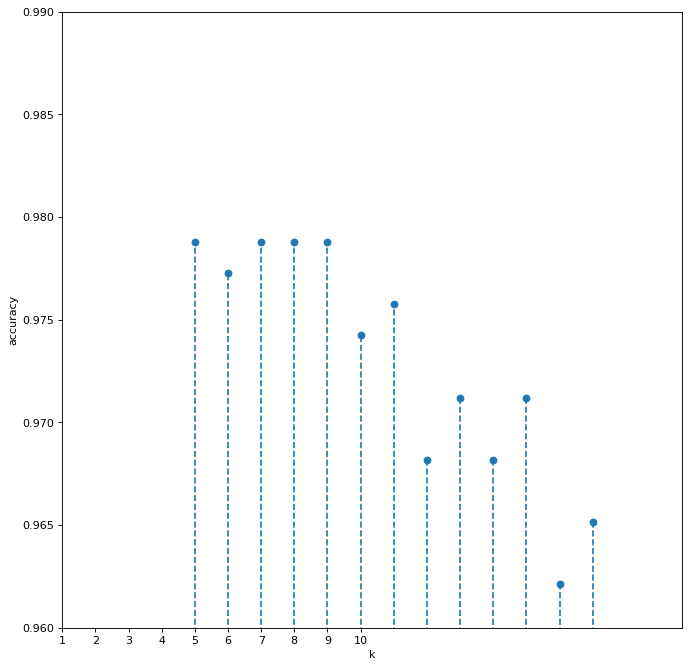

In [59]:
k_range = range(5, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range, 0, scores, linestyle="dashed")
plt.ylim(0.96, 0.99)
plt.xticks([i for i in range(1, 11)])

In [60]:
KNN = KNeighborsClassifier(n_neighbors=9).fit(x_train, y_train)
predicted_values = KNN.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbors')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      1.00      0.98        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.81      0.97      0.88        31
 kidneybeans       0.87      1.00      0.93        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      0.96      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

# Exemple de prediction

In [61]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
KNNprediction = KNN.predict(data)
print(KNNprediction)

['jute']


# verification de l'overfitting

In [62]:
print('KNN Accuracy on training set: ', KNN.score(x_train, y_train))
print('KNN Accuracy on test set: ', KNN.score(x_test, y_test))

KNN Accuracy on training set:  0.9824675324675325
KNN Accuracy on test set:  0.9787878787878788


# Prediction avec NAIVE BAYES

In [63]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)
predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.91      0.97      0.94        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

# Exemple de prediction

In [64]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
NaiveBayesprediction = NaiveBayes.predict(data)
print(NaiveBayesprediction)

['jute']


# Verification de l'overfitting

In [65]:
print('NaiveBayes Accuracy on training set: ',
      NaiveBayes.score(x_train, y_train))
print('NaiveBayes Accuracy on test set: ', NaiveBayes.score(x_test, y_test))

NaiveBayes Accuracy on training set:  0.9948051948051948
NaiveBayes Accuracy on test set:  0.9939393939393939


# Prediction avec RANDOM FOREST

In [66]:
RandomForest = RandomForestClassifier(n_estimators=20, random_state=0)
RandomForest.fit(x_train, y_train)

predicted_values = RandomForest.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RandomForest')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.97      0.98        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

# Exemple de prediction

In [67]:
data = np.array([[90, 42, 43, 20.879744, 75, 5.5, 220]])
RandomForestPrediction = RandomForest.predict(data)
print(Fore.BLUE + Style.NORMAL +"LA MEILLEURE PLANTE A CULTIVER EST : {}".format(RandomForestPrediction))


LA MEILLEURE PLANTE A CULTIVER EST : ['rice']


# Verification de l'overfitting

In [68]:
print(Fore.BLUE + Style.NORMAL +'Random Forest Accuracy on training set: ',
      RandomForest.score(x_train, y_train))
print(Fore.BLUE + Style.NORMAL +'Random Forest Accuracy on test set: ',
      RandomForest.score(x_test, y_test))

Random Forest Accuracy on training set:  1.0
Random Forest Accuracy on test set:  0.9954545454545455


# Comparaison entre les differents modeles

In [69]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print(Fore.BLUE + Style.NORMAL +k, ' : ', v)

Logistic Regression  :  0.95
Decision Tree  :  0.9878787878787879
K Nearest Neighbors  :  0.9787878787878788
Naive Bayes  :  0.9939393939393939
RandomForest  :  0.9954545454545455


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

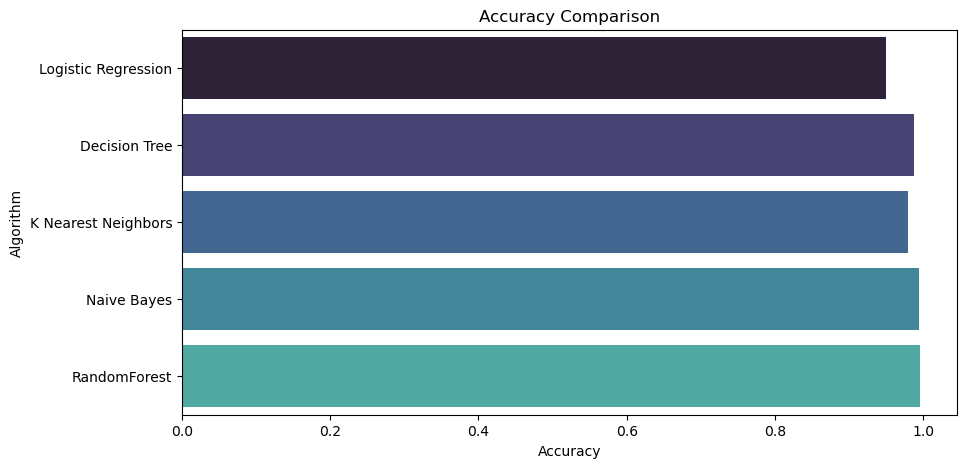

In [70]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model, palette=sns.color_palette("mako"))

# RANDOM FOREST est l'algorithme avec une meilleur score

# Le fichier pickle du modele avec  l'algorithme au meilleure prediction

In [71]:
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForest, RF_Model_pkl)
RF_Model_pkl.close()

In [72]:
current_directory = os.getcwd()
print(current_directory)
